### FE - 680 Assignment 1

Completed By: Riley Heiman

Instructor: Dragos Bozdog (PhD)



In [3]:
import os 
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns

import matplotlib.pyplot as plt 

In [4]:
os.chdir(r'D:\Documents\Stevens\FE-680\HW1')
os.getcwd() 

# print(os.listdir())    

'D:\\Documents\\Stevens\\FE-680\\HW1'

---

## Problem 1

- Fill in forward curve, discount curve, zero curve

### Forward Rate 
$r_0(t_1, t_2) =$ Forward rate  between time $t_1$ and $t_2$

$[ 1 + r_0(0,1)][ 1 + r_0(1,2)] =  [1 + r_0(0,2)^2] $

$[ 1 + r_0(1,2)] = \frac{[1 + r_0(0,2)^2]}{[ 1 + r_0(0,1)]} $

$r_0(1,2) = \frac{[1 + r_0(0,2)^2]}{[ 1 + r_0(0,1)]} - 1 $

$f(t) = \frac{d(t-1)}{d(t)} -1 $
### Discount Rate

$ d_1 = \frac{1}{ (1+f_1)} $

$ d_2 = \frac{1}{ (1+f_1) (1+f_2) } $

$ d_n = \frac{1}{ (1+f_1) (1+f_2) ... (1+f_n) } $


### Zero Rate
$ z(t) = (\frac{1}{d(t)})^\frac{1}{t} - 1$

### Par Coupon Rate

$c = \frac{1- d(t)}{\Sigma d(i)}$

In [28]:

def forward(dt_1, dt):
    return(  ((dt_1 / dt)-1) * 100  ) 

def discount_rate(list_of_rates):
    new_d = [((i/100)+1) for i in list_of_rates]
    denominator = np.prod(new_d)
    return( round( 1/denominator , ndigits = 4) ) 

def zero(dt,t):
    return( ((1/dt)**(1/t) - 1)*100 )

def coupon(list_of_dts):
    l = len(list_of_dts)
    number = (1 - list_of_dts[(l-1)]) / np.sum(list_of_dts)
    return( number*100 )

In [29]:
dn = [5, 5.2]
discount_rate(dn) 

0.9053

In [32]:
df = pd.DataFrame({'TYPE': ['OVERNIGHT', 'CASH', 'CASH', 'FORWARDS', 'FORWARDS', 'FORWARDS', 'SWAPS', 'SWAPS','SWAPS','SWAPS','SWAPS',],
                   'YEARS': np.arange(0,11,1),
                   'INPUTS': [1.9, 2.2, 2.4, 2.5, 2.75, 2.8, 2.85, 3.1, 3.150, 3.3, 3.45] })
n_row, n_col = df.shape
df.head(45)

,TYPE,YEARS,INPUTS
0,OVERNIGHT,0,1.90
1,CASH,1,2.20
2,CASH,2,2.40
3,FORWARDS,3,2.50
4,FORWARDS,4,2.75
5,FORWARDS,5,2.80
6,SWAPS,6,2.85
7,SWAPS,7,3.10
8,SWAPS,8,3.15
9,SWAPS,9,3.30


In [33]:
DISCOUNT = []
DISCOUNT.append(1.0)
print(DISCOUNT) 

for i in range(1, n_row): 
    DISCOUNT.append( discount_rate( df['INPUTS'].iloc[1:i] ) ) 
df.insert(3, 'DISCOUNT_RATE', DISCOUNT)


[1.0]


In [34]:
FORWARD = []
FORWARD.append(1.9)
FORWARD.append(2.2)

for i in range(2, n_row):
    FORWARD.append( forward( df['DISCOUNT_RATE'].iloc[i-1],  df['DISCOUNT_RATE'].iloc[i]))

df.insert(4, 'FORWARD_RATE', FORWARD)



In [35]:
COUPON = []
COUPON.append(1.9)
COUPON.append(2.2)

for i in range(2, n_row):
    COUPON.append( coupon(df['DISCOUNT_RATE'].iloc[0:i])  )

df.insert(5, 'COUPON_RATE', COUPON)

In [36]:
ZERO = []
ZERO.append(1.0)

for i in range(1,n_row):
    ZERO.append( zero( df['DISCOUNT_RATE'].iloc[i], df['YEARS'].iloc[i] ) )

df.insert( 6, 'ZERO_RATE', ZERO )

In [38]:
df.head(45) 

,TYPE,YEARS,INPUTS,DISCOUNT_RATE,FORWARD_RATE,COUPON_RATE,ZERO_RATE
0,OVERNIGHT,0,1.90,1.0000,1.900000,1.900000,1.000000
1,CASH,1,2.20,1.0000,2.200000,2.200000,0.000000
2,CASH,2,2.40,0.9785,2.197241,0.000000,1.092651
3,FORWARDS,3,2.50,0.9555,2.407117,0.721840,1.528921
4,FORWARDS,4,2.75,0.9322,2.499464,1.131164,1.770691
5,FORWARDS,5,2.80,0.9073,2.744406,1.393284,1.964693
6,SWAPS,6,2.85,0.8826,2.798550,1.605612,2.103198
7,SWAPS,7,3.10,0.8581,2.855145,1.763796,2.210282
8,SWAPS,8,3.15,0.8323,3.099844,1.888425,2.321056
9,SWAPS,9,3.30,0.8069,3.147850,2.009225,2.412594



b.)  Compute the PV of the bond cashflows 

<span style="color:#1a4cd6">

$$ PV = \Sigma d(t_i) * C(i) $$

</span>



In [45]:
PV = np.sum(   df['DISCOUNT_RATE'] * df['COUPON_RATE'] )
PV = np.round(PV, decimals = 2)
print("The Present Value = $" + str(PV) )  

The Prent Value = $15.24



b.) Change the forward curve by +0.5% (at each maturity one at a time)  

- Compute the discount factors and 
    - PV
    - DV01
    - Duration. 
        - Which forward change has the highest DV01?


In [49]:
dfc = df.copy()
dfc['INPUTS'] = dfc['INPUTS'] + .5

DISCOUNT = []
DISCOUNT.append(0)

for i in range(1, n_row): 
    DISCOUNT.append( discount_rate( dfc['INPUTS'].iloc[1:i] ) ) 
dfc['DISCOUNT_RATE'] = DISCOUNT


FORWARD = []
FORWARD.append(1.9)
FORWARD.append(2.2)

for i in range(2, n_row):
    FORWARD.append( forward( dfc['DISCOUNT_RATE'].iloc[i-1],  dfc['DISCOUNT_RATE'].iloc[i]))

dfc['FORWARD'] = FORWARD

COUPON = []
COUPON.append(1.9)
COUPON.append(2.2)

for i in range(2, n_row):
    COUPON.append( coupon(dfc['DISCOUNT_RATE'].iloc[0:i])  )

dfc['COUPON_RATE'] = COUPON


PV = np.sum(   dfc['DISCOUNT_RATE'] * dfc['COUPON_RATE'] )
PV = np.round(PV, decimals = 2)
print("The Present Value = $" + str(PV) )  


The Present Value = $17.39



$${}$$

- Compute the PV of the bond when increasing simultaneously all the forward rates by 1%,2%, and 3%

- What is the forward price of the bond 18 months from today?

---

### Problem 2

Consider an eight-month European put option on a Treasury bond that currently has **14.25 years to maturity**. The current cash bond price is **$908**, the exercise price is $900, and the volatility for the bond price is **10%** per annum. A coupon of **$25** will be paid by the bond in **three months**. The risk-free interest rate is **1.5%** for all maturities up to one year. Use Black’s model to determine the price of the option. Consider both the case where the strike price corresponds to the cash price of the bond and the case where it corresponds to the quoted price. 

<span style="color:#1a4cd6">

This is a great problem!

**Summary:**

Price a *put* option, with 8 months untill expiration. 

The Bond has the following conditions: 
- Years to maturity = 14.25
- Bond Price = $908
- Exercise Price = $900
- Volatility of Bond Price = 10%
- Coupon = $25 (paid in 3 months)
- risk-free rate ($r$) = 1.5%


Week 2 lecture says: 

$F_0 = E[F_T]$

$$ c = P(0, t)[F_B N(d_1) - k N_(d_2)] $$

$$ p = P(0, t)[kN(-d_2) - F_BN(-d_1)] $$

where: 
$$d_1 = \frac{ln(\frac{F_B}{k}) + \sigma_B^2 \frac{T}{2}} {\sigma_B \sqrt{T}}$$

$$ d_2 = d_1 - \sigma_B \sqrt{T} $$

$F_B$ = forward bond price

$$ F_B  = \frac{B_0 - I}{ P(0,t) }$$

$ B_0 = $ Bond at time 0

$I =$ present value of coupons in $(0,t)$

$P(t,T) = $ price at the t of a zero-coupon bond that pays $1 at T 

$$ P(t, T) = e^{-r(T-t)} $$ 

</span>

Page 134 of Hull (Chapter 6)



In [180]:

# INPUTS: 
B0 = 908

c = 25
r = .015
time_to_expiration = 8/12
K = 900
sigma = .10

# Step 1: Price I
I = c*np.exp(-r*.25)

# Step 2: Price ZCB (P(0,T))
P0t = np.exp(-r*time_to_expiration)

# Step 3: Price Forward bond price (F_B)
FB = (B0 - I)/P0t


# Step 5: Price nd1
d1 = ((np.log(FB/K)) + .1**2 * time_to_expiration/2 )
d1= d1/(sigma*np.sqrt(time_to_expiration))
nd1 = norm.cdf(d1,loc=0, scale=1)

# Step 6: Price nd2
d2 = d1 - sigma*np.sqrt(time_to_expiration)
nd2 = norm.cdf(d2,loc=0, scale=1)

# Step 7: Price c
c = P0t*(FB*nd1 - K*d2)
c = np.round(c, decimals = 2)

# Step 8: Price p
p = P0t*(K*norm.cdf(-d2,loc=0, scale=1) - FB*norm.cdf(-d1,loc=0, scale=1))
p = np.round(p, decimals = 2)

# print(c)
print(p)


33.04


### The final price is listed above (33.04)


---
## Problem 3
Consider the following data: 

Use the data provided to build the yield curve using the **cubic spline model**. Report the value for the estimated coefficients and write the final expression for the rate as

$$ R(0,t) = a + b( t- t_1) + c(t - t_1)^2 + \Sigma_{k=1}^{n-1} d_k (t-t_k)^3_+ $$

a) Plot the fitted model and the original yield rates on the same graph. Compare the results.


b) Calculate the yield rate for 𝑡𝑡= 4 years.


<span style="color:#1a4cd6">

Inputs = x, and y

x = time to maturity

y = yield rate

$$\:$$

This is a 4 step process

$$\:$$

#### Step 1:  For the matrix A, and R fill out the matrix with values

$$ \begin{bmatrix}
R_1 \\ 
R_2 \\
R_3 \\
. \\
. \\
0 \\
0 
\end{bmatrix}
 = 

A

\begin{bmatrix}
a \\ 
b \\
c \\
d_1 \\
. \\
. \\
d_{n-1} 
\end{bmatrix}

$$


#### Step 2:  Multiply the matrix on the right hand side 
$$
\begin{bmatrix}
a \\ 
b \\
c \\
d_1 \\
. \\
. \\
d_{n-1} 
\end{bmatrix}
 = 
A^{-1}

 \begin{bmatrix}
R_1 \\ 
R_2 \\
R_3 \\
. \\
. \\
0 \\
0 
\end{bmatrix}
$$


#### Step 3: Based upon coefficient matrix, plug in x values to generate a line.


#### Step 4: Plot it!


</span>



In [3]:
df = pd.DataFrame({
    'TIME_TO_MATURITY':[.25,.5,1,2,3,5,7,10,20],
    'YIELD_RATE':[1.2,1.23, 1.3, 1.5, 1.77, 2.4, 3.14, 3.45, 3.8]
})

df.head()

,TIME_TO_MATURITY,YIELD_RATE
0,0.25,1.20
1,0.50,1.23
2,1.00,1.30
3,2.00,1.50
4,3.00,1.77


In [44]:
x =  np.asarray([2,3,4])
y =  np.asarray([3,2,4])

x = np.asarray(df['TIME_TO_MATURITY'])
y = np.asarray(df['YIELD_RATE'])

n = len(x)

sub_sets = n-1; print(sub_sets)   # This means we have N equations


A = np.zeros((4*(sub_sets), 4*(sub_sets)))
b = np.concatenate([y[:1], np.repeat(y[1:-1], 2), y[-1:], np.zeros(2*(sub_sets))])

xi = 0

for i in range(sub_sets):
    r = i*2
    c = i*4

    A[r][c:c+4] = [x[xi]**3, x[xi]**2, x[xi], 1]
    xi += 1
    A[r+1][c:c+4] = [x[xi]**3, x[xi]**2, x[xi], 1]

c = 0
xi = 0

for i in range(sub_sets-1):
    c = i*4
    r += 2
    xi += 1

    A[r][c:c+3] = [3*(x[xi]**2), 2*x[xi], 1]
    A[r][c+4:c+7] = [-(3*(x[xi]**2)), -(2*x[xi]), -1]

    A[r+1][c:c+2] = [6*(x[xi]), 2]
    A[r+1][c+4:c+6] = [-(6*(x[xi])), -2]

A[-2][:2] = [6*x[0], 2]
A[-1][-4:-2] = [6*x[-1], 2]

print(A)  
print(b)  


8
[[ 0.015625  0.0625    0.25     ...  0.        0.        0.      ]
 [ 0.125     0.25      0.5      ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ... -2.        0.        0.      ]
 [ 1.5       2.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  2.        0.        0.      ]]
[1.2  1.23 1.23 1.3  1.3  1.5  1.5  1.77 1.77 2.4  2.4  3.14 3.14 3.45
 3.45 3.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.  ]


In [45]:
### Based upon the input data, X & Y, now we can do the matrix multiplication to sovle for matrix [a ,b, c, d1, d2, d3]

A_INVERSE = np.linalg.inv(A)

c = np.dot(A_INVERSE, b)
c = c.reshape(-1 , 4)

#  lines = np.dot(np.linalg.inv(A), b).reshape(-1, 4)
#  expanded = np.hstack([c[i] * (values ** i) for i in range(0, len(coeffs))])
#  np.sum(expanded, axis=1)

print(c) 


[[ 3.47808384e-02 -2.60856288e-02  1.24347605e-01  1.17000000e+00]
 [ 1.04383232e-02  1.04281440e-02  1.06090718e-01  1.17304281e+00]
 [-5.08958097e-06  4.17583823e-02  7.47604801e-02  1.18348623e+00]
 [-1.34607793e-02  1.22492520e-01 -8.67077961e-02  1.29113174e+00]
 [ 6.87567490e-03 -6.05355670e-02  4.62376466e-01  7.42047482e-01]
 [-2.19738815e-02  3.72207780e-01 -1.70134027e+00  4.34824204e+00]
 [ 1.01840524e-02 -3.03108832e-01  3.02587602e+00 -6.68192929e+00]
 [-8.04246134e-05  4.82547680e-03 -5.34670747e-02  3.58254768e+00]]


In [46]:
c[0,1]

-0.026085628804966454

0.25
20.0


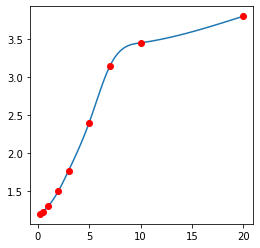

In [50]:
min_x = np.min(x)
max_x = np.max(x)

print(min_x)
print(max_x)

x_steps = np.arange(min_x, max_x, step = (max_x -min_x)/100 )


y_line = []
final_y = []


for count, value in enumerate(x):

    if count >=1:
        y_line = x_steps[ (x_steps<=value) & (x_steps>=x[count-1])]
        
        for j_count, j_value in enumerate(y_line): 
            final_y.append( c[count-1,3] + c[count-1,2]* j_value**1 + c[count-1,1]* j_value**2 + c[count-1,0]* j_value**3  )



#plt.plot(x_steps, final_y)


fig, ax = plt.subplots(figsize=(4,4))
plt.plot(x_steps, final_y)
plt.plot(df['TIME_TO_MATURITY'], df['YIELD_RATE'], 'o', color = 'red')
plt.show()



### This was a fun one. 

### How can this method be applied to other problems in a variety of industries ? 

---
## Problem 4

The European Central Bank reports the Euro yield curve by providing the Nelson-Siegel parameters. Use the functional form of Nelson-Siegel model to estimate the parameters 𝛽0, 𝛽1, 𝛽2, 𝜏1 for the Treasury Coupon Bonds provided below. The Nelson-Siegel model assumes that:

$$ R(0,t) = \beta_0  + \beta_1 (\frac{1 - e^{-t\lambda}}{t \lambda}) + \beta_2 (\frac{1 - e^{-t \lambda}}{t \lambda} - e^{-t\lambda}) $$


Let 

$$ MSE = \frac{1}{n} \Sigma_{i=1}^n (Y_i - Y_{i hat})^2 $$

In [66]:
df = pd.read_excel('HW1_data_for_Problem_4_F22-Riley.xlsx')
df.head(5)


,Time to next payment,Payment frequency,Time to maturity,Coupon rate,Clean Price,YTM
0,0.4356,2,0.4356,0.0088,100.30,0.010796
1,0.2644,2,0.7644,0.0088,100.48,0.010674
2,0.2658,2,1.2658,0.0075,100.50,0.009040
3,0.4342,2,1.9342,0.0063,100.31,0.007669
4,0.0192,2,2.0192,0.0038,99.78,0.004893


In [92]:
def rt(t, beta0, beta1, beta2, LAMBDA):
     r_t = beta0 + beta1*(1-np.exp(-t*LAMBDA) / (t*LAMBDA) )  +  beta2*( (1-np.exp(-t*LAMBDA) / (t*LAMBDA) ) - np.exp(-t*LAMBDA) )
     r_t = np.array(r_t)
     return(r_t) 


def MSE(actual_values, estimate):
     sub_set = actual_values - estimate
     sub_set = np.power(sub_set,2)
     return( np.mean(sub_set) )

In [94]:
YEILD = np.array(df['YTM'])
time = np.array(df['Time to maturity'])


In [175]:

BETA0 = np.arange( .00001 , .01, .001)
BETA1 = np.arange( .00001 , .01, .001)
BETA2 = np.arange( .00001 , .01, .001)
LAMBDA = np.arange(1 , 55, 1)

l1 = len(BETA0)
l2 = len(BETA1)
l3 = len(BETA2)
l4 = len(LAMBDA)

print('TOTAL LOOPS = ' + str(l1*l2*l3*l4 ))


TOTAL LOOPS = 54000


In [176]:
b0 = []
b1 = []
b2 = []
lam = []
MSE_LIST = []


for beta0 in BETA0:
    for beta1 in BETA1:
        for beta2 in BETA2:
            for lambd_a in LAMBDA:

                YC = rt(time , beta0, beta1, beta2, lambd_a)

                b0.append(beta0)
                b1.append(beta1)
                b2.append(beta2)
                lam.append(lambd_a)
                MSE_LIST.append(MSE( YEILD , YC ))



In [177]:
print(len(b0))
print(len(b1))
print(len(b2))
print(len(lam))
print(len(MSE_LIST))

54000
54000
54000
54000
54000


In [178]:
results_df = pd.DataFrame({ 'B0':b0, 
                             'B1':b1,
                             'B2':b2,
                             'LAMBDA':lam,
                             'MSE':MSE_LIST  } )

top_10_model = results_df.sort_values(by = 'MSE')
top_10_model.head(10)

,B0,B1,B2,LAMBDA,MSE
53946,0.00901,0.00901,0.00901,1,0.000139
53892,0.00901,0.00901,0.00801,1,0.000146
53406,0.00901,0.00801,0.00901,1,0.000146
48546,0.00801,0.00901,0.00901,1,0.000147
53947,0.00901,0.00901,0.00901,2,0.000148
48547,0.00801,0.00901,0.00901,2,0.000153
53407,0.00901,0.00801,0.00901,2,0.000153
53893,0.00901,0.00901,0.00801,2,0.000154
53838,0.00901,0.00901,0.00701,1,0.000154
53352,0.00901,0.00801,0.00801,1,0.000154


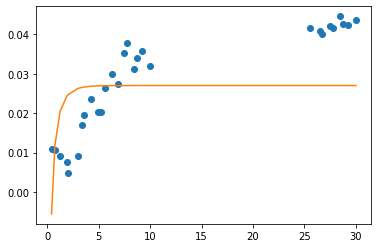

In [179]:



YC = rt(time , 0.00901,	0.00901	,0.00901, 1)

plt.plot(df['Time to maturity'], df['YTM'], 'o')
plt.plot(time, YC)



In [ ]:
## The model above can be improved to fit a better model. 

# Some Ideas include an optimzation engine, or running more for loops! 

---

### Thank you for offering some amazing problems to work on. 

### Any and all feedback is appreciated. Thank you!
